In [1]:
import sys
import numpy as np
import pandas as pd
import numpy.linalg as LA
import numpy.random as RA
from numpy.linalg import norm
%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append('/Users/clancy/repos/hermite_trust_region')

np.set_printoptions(threshold=np.inf, precision=2, suppress=True,linewidth=210)

#sys.path.append('/Users/clancy/Research/hermite_trust')


In [2]:
gallery = 'data_existing/'

suffix = '.csv'
#DFc = pd.read_csv(gallery + 'combined_gradevery5it_using1grad.csv')
DFc = pd.read_csv(gallery + 'combined_gradevery5it_using1grad.csv')

problems = list(DFc['problem'])
get_rid= ['DIAMON3DLS', 'STRATEC','LUKSAN15LS','LUKSAN16LS','MANCINO','LUKSAN12LS','PARKCH','DMN15103LS', 'DMN37143LS','DMN37142LS','DIAMON2DLS','HYDC20LS','ERRINROS', 'ERRINRSM','LUKSAN22LS','LUKSAN14LS','METHANL8LS', 'CHNRSNBM']
for g in get_rid:
    #if g in problems:
    print(g)
    problems.remove(g)



DIAMON3DLS
STRATEC
LUKSAN15LS
LUKSAN16LS
MANCINO
LUKSAN12LS
PARKCH
DMN15103LS
DMN37143LS
DMN37142LS
DIAMON2DLS
HYDC20LS
ERRINROS
ERRINRSM
LUKSAN22LS
LUKSAN14LS
METHANL8LS
CHNRSNBM


In [3]:
# prescribe which files we are pulling to plot
pre_suf = []

#pre_suf.append([gallery + 'hitr_mns_','_gradevery5it_using1grad.csv', 'HITR, 5 its. 1 grad., MNS'])
#pre_suf.append([gallery + 'hitr_mns_','_gradevery5it_using2grad.csv', 'HITR, 5 its. 2 grad., MNS'])
#pre_suf.append([gallery + 'hitr_mns_','_gradevery5it_using3grad.csv', 'HITR, 5 its. 3 grad., MNS'])

#pre_suf.append([gallery + 'hitr_mns_','_gradevery10it_using1grad.csv', 'HITR, 10 its. 1 grad., MNS'])
pre_suf.append([gallery + 'hitr_mns_','_gradevery10it_using2grad.csv', 'HITR, 10 its. 2 grad., MNS'])
#pre_suf.append([gallery + 'hitr_mns_','_gradevery10it_using3grad.csv', 'HITR, 10 its. 3 grad., MNS'])



#pre_suf.append([gallery + 'hitr_bfgs_','_gradevery5it_using1grad.csv', 'HITR, 5 its. 1 grad., BFGS'])
#pre_suf.append([gallery + 'hitr_bfgs_','_gradevery5it_using2grad.csv', 'HITR, 5 its. 2 grad., BFGS'])
#pre_suf.append([gallery + 'hitr_bfgs_','_gradevery5it_using3grad.csv', 'HITR, 5 its. 3 grad., BFGS'])

#pre_suf.append([gallery + 'hitr_bfgs_','_gradevery10it_using1grad.csv', 'HITR, 10 its. 1 grad., BFGS'])
pre_suf.append([gallery + 'hitr_bfgs_','_gradevery10it_using2grad.csv', 'HITR, 10 its. 2 grad., BFGS'])
#pre_suf.append([gallery + 'hitr_bfgs_','_gradevery10it_using3grad.csv', 'HITR, 10 its. 3 grad., BFGS'])




pre_suf.append([ gallery + 'itr_', '_gradevery1it_using1grad.csv', 'Int TR'])
#pre_suf.append([ gallery + 'sr1_', '_gradevery1it_using1grad.csv', 'SR1 TR'])


num_its = 10
regularizer = 'mns_bfgs_2derivs'


gallery = '/Users/clancy/repos/overleaf/dissertation/figs/hermite_tr/'

prefix = gallery + regularizer + '_' + str(num_its) + 'its' + '_'

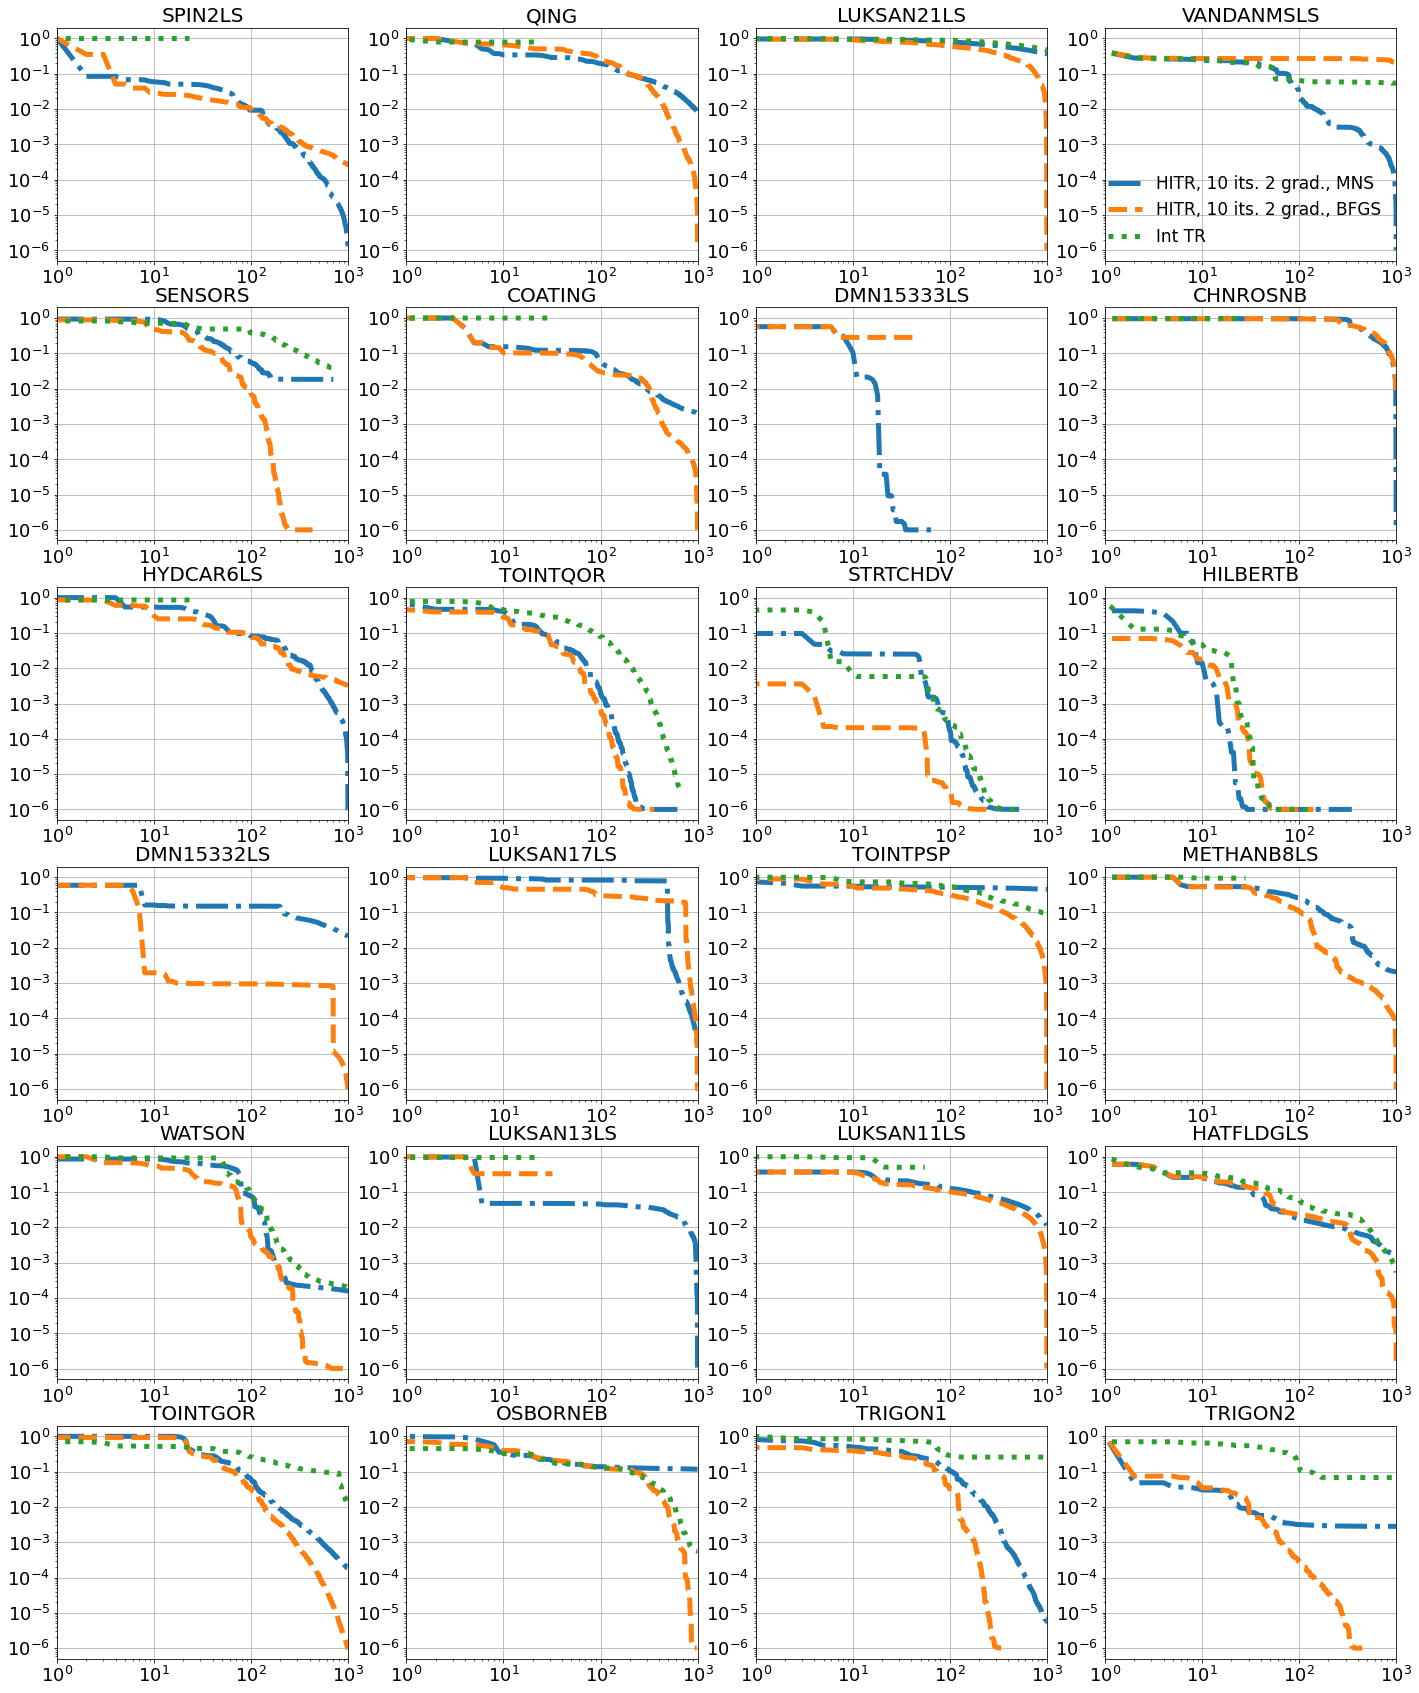

In [4]:
columns_in_plot = 4
plot_rows = int(np.ceil(len(problems)/columns_in_plot))

# decide which field to plot
field_to_plot = 'funcval'




plt.figure(figsize=(columns_in_plot*6, plot_rows*5))
i = 0
for prob in problems:
    i += 1

    data_array = []
    min_list = []
    max_list = []

    for j, deets in enumerate(pre_suf):
        # pull current file
        curr_file = deets[0] + prob + deets[1]
        try:
            df = pd.read_csv(curr_file)
            curr_data = df[field_to_plot]
        except:
            curr_data = np.array([])
            print('Error with', prob, deets)
            curr_data = np.array([np.inf])
        

        temp = curr_data[2:]
        if list(temp) != []:
            curr_data = temp
        
        # store the minimum/maximum value across different solvers 
        min_list.append(min(curr_data))
        max_list.append(max(curr_data))

        # append to data_array
        data_array.append(np.asarray(curr_data))
        

    min_val = min(min_list)
    max_val = max(max_list)

    plt.subplot(plot_rows, columns_in_plot, i)
    for j, yraw in enumerate(data_array):

        mytitle = pre_suf[j][2]
        if 'MNS' in mytitle:
            ls = '-.'
        else:
            ls ='-'
        if 'BFGS' in mytitle:
            ls = '--'
        if 'Int' in mytitle:
            ls = ':'

        y = 1*(yraw - min_val)/(max_val-min_val) + 1e-6
        plt.loglog(y, label=mytitle, linestyle=ls, linewidth=5)
        plt.xlim([1,1000])
    
    plt.title(prob, fontsize=20)
    plt.grid()
    if i == 4:
        plt.legend(framealpha=0.0,prop={'size': 17})    
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)

#plt.savefig('figs/bfgs5its.pdf')  
#plt.savefig('figs/mns5its.pdf')  
#plt.savefig('figs/MNS_BFGS_2DERIVS.pdf')  
plt.savefig(prefix + 'funcs_all.pdf')  


#plt.figure(facecolor=None)      
plt.show()


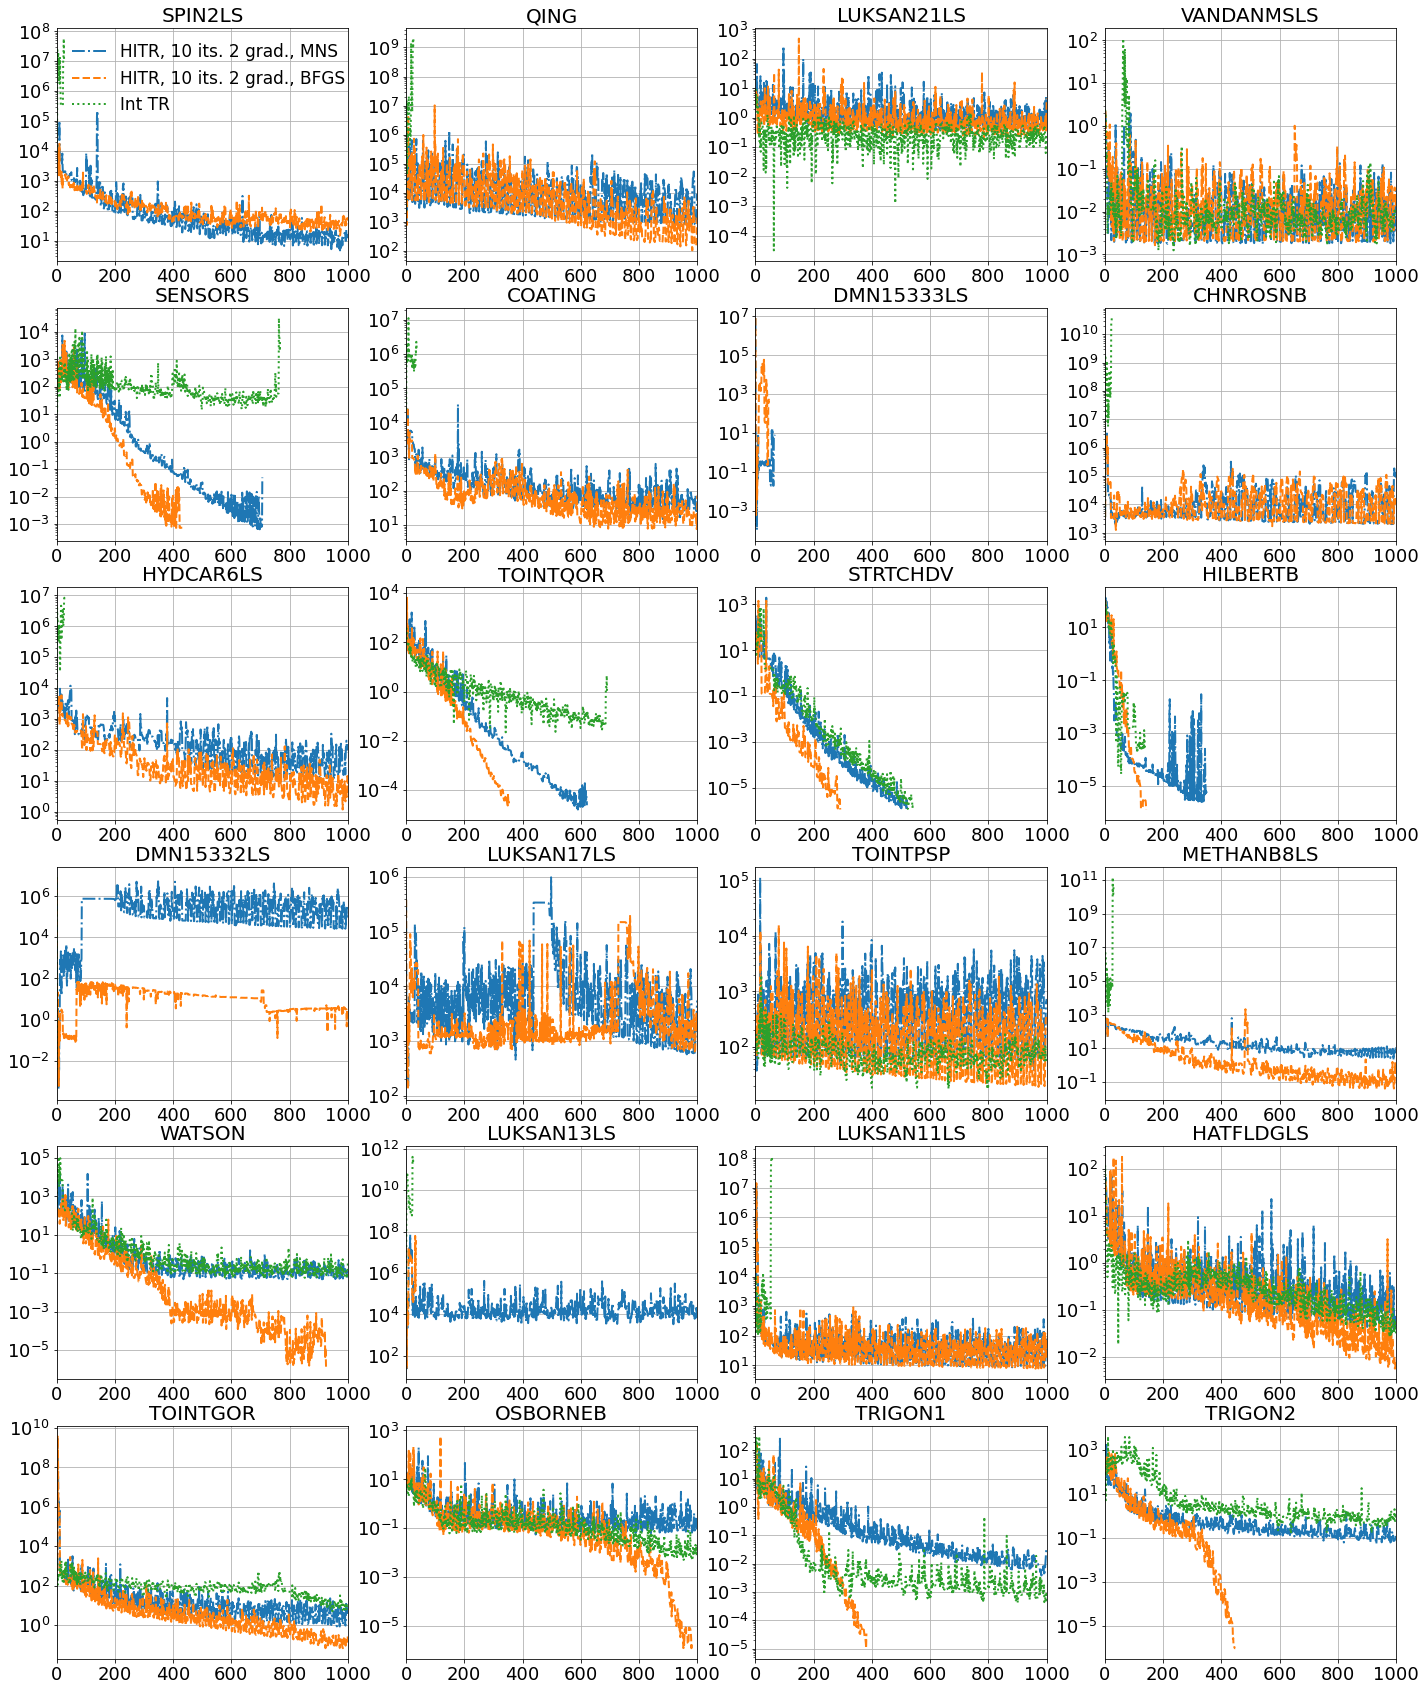

In [5]:
columns_in_plot = 4
plot_rows = int(np.ceil(len(problems)/columns_in_plot))

# decide which field to plot
field_to_plot = 'gradnorm'




plt.figure(figsize=(columns_in_plot*6, plot_rows*5))
i = 0
for prob in problems:
    if prob == 'SENSORS':
        prob = prob
    i += 1

    data_array = []
    min_list = []

    # look at each different solution method (hermite-mns, hermite-bfgs, )
    # take
    for j, deets in enumerate(pre_suf):
        # pull current file
        curr_file = deets[0] + prob + deets[1]
        try:
            # read csv from current file and store desire data into curr_data
            df = pd.read_csv(curr_file)
            curr_data = df[field_to_plot]
        except:
            curr_data = np.array([])
            print('Error with', deets)
        
        # store the minimum value across different solvers 
        min_list.append(min(curr_data))

        # append to data_array
        data_array.append(curr_data)

    min_funcval = min(min_list)

    plt.subplot(plot_rows, columns_in_plot, i)
    for j, yraw in enumerate(data_array):

        mytitle = pre_suf[j][2]
        if 'MNS' in mytitle:
            ls = '-.'
        else:
            ls ='-'
        if 'BFGS' in mytitle:
            ls = '--'
        if 'Int' in mytitle:
            ls = ':'
        y = yraw
        #plt.loglog(y, label=mytitle, linestyle=ls)
        plt.semilogy(y, label=mytitle, linestyle=ls, linewidth=2)
        plt.xlim([0,1000])
    
    plt.title(prob, fontsize=20)
    plt.grid()
    if i == 1:
        plt.legend(framealpha=0.0,prop={'size': 17})     
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    
plt.savefig(prefix + 'grads_all.pdf')  


        
plt.show()


In [6]:
#problems1 = problems[0:12]
problems1 = problems

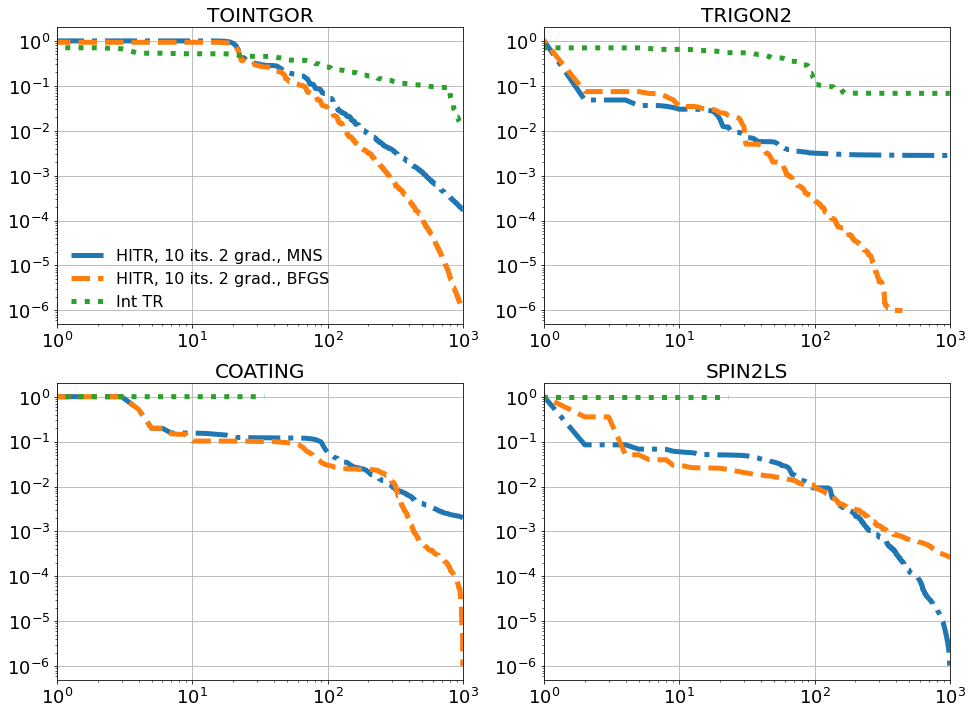

In [7]:
problems1 = ['TOINTGOR','TRIGON2', 'COATING', 'SPIN2LS']


columns_in_plot = 2
plot_rows = int(np.ceil(len(problems1)/columns_in_plot))

# decide which field to plot
field_to_plot = 'funcval'




plt.figure(figsize=(columns_in_plot*8, plot_rows*6))
i = 0
for prob in problems1:
    i += 1

    data_array = []
    min_list = []
    max_list = []

    for j, deets in enumerate(pre_suf):
        # pull current file
        curr_file = deets[0] + prob + deets[1]
        try:
            df = pd.read_csv(curr_file)
            curr_data = df[field_to_plot]
        except:
            curr_data = np.array([])
            print('Error with', prob, deets)
            curr_data = np.array([np.inf])
        

        temp = curr_data[2:]
        if list(temp) != []:
            curr_data = temp
        
        # store the minimum/maximum value across different solvers 
        min_list.append(min(curr_data))
        max_list.append(max(curr_data))

        # append to data_array
        data_array.append(np.asarray(curr_data))
        

    min_val = min(min_list)
    max_val = max(max_list)

    plt.subplot(plot_rows, columns_in_plot, i)
    for j, yraw in enumerate(data_array):

        mytitle = pre_suf[j][2]
        if 'MNS' in mytitle:
            ls = '-.'
        else:
            ls ='-'
        if 'BFGS' in mytitle:
            ls = '--'
        if 'Int' in mytitle:
            ls = ':'

        y = 1*(yraw - min_val)/(max_val-min_val) + 1e-6
        plt.loglog(y, label=mytitle, linestyle=ls, linewidth=5)
        plt.xlim([1,1000])
    
    plt.title(prob, fontsize=20)
    plt.grid()
    if i  == 1:
        plt.legend(framealpha=0.0,prop={'size': 16})    
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)

#plt.savefig('figs/bfgs5its.pdf')  
#plt.savefig('figs/mns5its.pdf')  
#plt.savefig('figs/MNS_BFGS_2DERIVS.pdf')  
#plt.savefig('figs/test.pdf')  
plt.savefig(prefix + 'funcs_subset.pdf')  
    
#plt.figure(facecolor=None)      
plt.show()
